In [1]:
from budyko import curves as bc
import statsmodels.formula.api as smf
import matplotlib as mpl
import statsmodels.api as sm
from palettable.colorbrewer.qualitative import Paired_10 as cbcust
from matplotlib.patches import Ellipse, Polygon
regcs = [2,3,1,4,9,7,10,8,5,6] # 
cbcust2 = []
for rc in regcs:
    cbcust2.append(cbcust.mpl_colors[rc-1])
    
# x = x values
# x0 = x threshold value p[0]
# y0 = y threshold value p[1]
# k1 = slope for first section p[2]
# k2 = slope for second section p[3]
def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

from scipy import optimize

In [2]:
def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height],axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

In [3]:
regs = [1,2,3,4,6,7,8,9,12,13] # region codes # old

regions = ['Cascades','East Cascades','North Cascades','Sierra','Northern Rockies','Middle Rockies',
           'Canadian Rockies','Idaho Batholith','Wasatch',
           'Southern Rockies']

tmp = pd.read_hdf('./budyko_working_er_all.hdf','df')

In [4]:
data = tmp[(tmp["rc"]==1) | (tmp["rc"]==2) | (tmp["rc"]==3) | (tmp["rc"]==4) | (tmp["rc"]==6) | (tmp["rc"]==7) | (tmp["rc"]==8) | (tmp["rc"]==9) | (tmp["rc"]==12) | (tmp["rc"]==13)]

In [5]:
for c in data.columns:
    print c

frlon
PETpenmanvic
P
ET
frlat
Sf
meanablseason
meandosnowfree
meanpeakswe
meanpeaket
meandopeaket
lon_x
meanablslope
lat_x
meandopeakswe
infilt
fs_active
l1_quartz
l3_Wpwp_FRACT
l3_bulkD
l3_init_moist
annual_prec
l2_soil_density
l2_Ksat
rough
l2_Wcr_FRACT
l2_depth
l2_quartz
l1_phi_s
l3_bubble
l1_expt
Ws
l1_Ksat
l1_soil_density
l1_resid_moisture
l2_phi_s
l2_init_moist
l2_expt
l1_init_moist
l1_depth
off_gmt
l3_expt
l3_depth
Dsmax
l1_Wpwp_FRACT
l3_resid_moisture
avg_T
l3_soil_density
l3_phi_s
dp
c
l2_bulkD
l2_bubble
l2_Wpwp_FRACT
l3_Ksat
l3_quartz
Ds
l1_bulkD
l1_bubble
l2_resid_moisture
elev
snow_rough
l1_Wcr_FRACT
l3_Wcr_FRACT
slope
rsquared_adj
intercept
rsquared
pvalue
w_flux
w_flux2
w_flux3
snowmelt
Sf2
Sf1
Sf_2
Sf_1
wflux4
wflux5
rain
netSM
seas
MAT
RR_pval
RR_intercept
RR_slope
RR_rsqrd
bf
sm3
sm2
sm1
prate
rr
Tmean
idx
meanrunoff
spaidx
lat_y
lon_y
DEMelev
idx2
rc


In [6]:
d = data[['PETpenmanvic','P','ET','snowmelt','bf','rc','rr','Sf','meanrunoff','rr','w_flux','meanpeakswe','meandopeakswe']].copy()

In [7]:
d['ET_P'] = d['ET']/d["P"]

In [8]:
d['PET_P'] = d['PETpenmanvic']/d['P']

In [9]:
X = np.array([d.P,d.PETpenmanvic]) # split out PET and P for parameter estimation

In [10]:
y = d.ET_P.as_matrix()

In [11]:
PET = np.linspace(0.00001,20,40000) # generate a sequence of PET and P to plot the budyko curves
P = np.linspace(1,2,40000)

In [12]:
X2 = np.array([P,PET])

In [13]:
curves = pd.DataFrame({'PET':PET,'P':P})
curves['PET_P'] = curves['PET']/curves['P']

In [14]:
n = bc.fit_mcy(X,y)
omega = bc.fit_fuzhang(X,y)
w = bc.fit_zhang(X,y)
k = bc.fit_zhou(X,y)

In [15]:
curves['schreiber'] = bc.schreiber(X2)
curves['oldekop'] = bc.oldekop(X2)
curves['turc_pike'] = bc.turc_pike(X2)
curves['budyko'] = bc.budyko(X2)
curves['myc'] = bc.mcy(X2,n)
curves['fuzhang'] = bc.fuzhang(X2,omega)
curves['zhang'] = bc.zhang(X2,w)
curves['sharif'] = bc.sharif(X2)
curves['zhou'] = bc.zhou(X2,k)

In [16]:
d.columns

Index([u'PETpenmanvic', u'P', u'ET', u'snowmelt', u'bf', u'rc', u'rr', u'Sf',
       u'meanrunoff', u'rr', u'w_flux', u'meanpeakswe', u'meandopeakswe',
       u'ET_P', u'PET_P'],
      dtype='object')

In [17]:
mod = smf.ols('snowmelt ~ Sf + 1',d).fit()

In [18]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               snowmelt   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     9060.
Date:                Thu, 30 Jun 2016   Prob (F-statistic):               0.00
Time:                        13:47:08   Log-Likelihood:                -47735.
No. Observations:               19983   AIC:                         9.547e+04
Df Residuals:                   19981   BIC:                         9.549e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2734      0.047      5.770      0.000         0.181     0.366
Sf             9.8325      0.103     95.183      0.000         9.630    10.035
==============================================================================
Omnibus:                     4783.427   Durbin-Watson:                   0.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11293.542
Skew:                           1.342   Prob(JB):                         0.00
Kurtosis:                       5.522   Cond. No.                         6.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

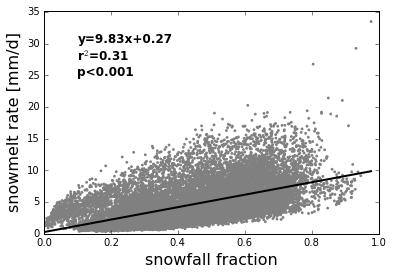

In [19]:
# Make Supplemental Figure
savefig=False
sms = np.linspace(d.Sf.min(),d.Sf.max(),1000)

fig = plt.figure(figsize=(6,4))
plt.scatter(d.Sf,d.snowmelt,s=8,c='0.5',edgecolor='None')
plt.plot(sms,(sms*mod.params['Sf'])+mod.params['Intercept'],'-k',lw=2)
plt.xlabel('snowfall fraction',fontsize=16)
plt.ylabel('snowmelt rate [mm/d]',fontsize=16)
plt.ylim(0,d.snowmelt.max());
plt.xlim(0,1)
eqn = 'y=%sx+%s'%(round(mod.params['Sf'],2),round(mod.params['Intercept'],2))+'\nr$^2$=%s \np<0.001'%(round(mod.rsquared,2))
plt.text(0.1,25,eqn,fontsize=12,fontweight='bold')

if savefig:
    plt.savefig('./figures/sf_sm_supplemental.png',dpi=300,bbox_inches='tight')
    plt.savefig('./figures/sf_sm_supplemental.pdf',bbox_inches='tight')

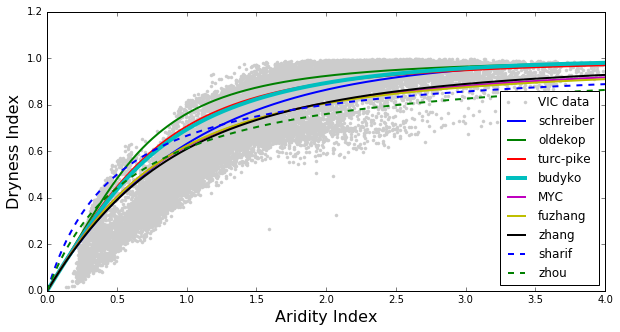

In [20]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.plot(d.PETpenmanvic/d.P,d.ET_P,'.',c='0.8',label='VIC data')

ax.plot(curves.PET_P,curves.schreiber,'-',label='schreiber',lw=2)
ax.plot(curves.PET_P,curves.oldekop,'-',label='oldekop',lw=2)
ax.plot(curves.PET_P,curves.turc_pike,'-',label='turc-pike',lw=2)
ax.plot(curves.PET_P,curves.budyko,'-',label='budyko',lw=4)
ax.plot(curves.PET_P,curves.myc,'-',label='MYC',lw=2)
ax.plot(curves.PET_P,curves.fuzhang,'-',label='fuzhang',lw=2)
ax.plot(curves.PET_P,curves.zhang,'-',label='zhang',lw=2)
ax.plot(curves.PET_P,curves.sharif,'--',label='sharif',lw=2)
ax.plot(curves.PET_P,curves.zhou,'--',label='zhou',lw=2)

ax.legend(loc ='lower right')
ax.set_xlabel('Aridity Index', fontsize = 16)
ax.set_ylabel('Dryness Index', fontsize = 16)

ax.set_ylim(0,1.2);
ax.set_xlim(0,4);

In [21]:
mean_bc = curves.schreiber.as_matrix()+curves.oldekop.as_matrix()+curves.turc_pike.as_matrix()+curves.budyko.as_matrix()+curves.myc.as_matrix()+curves.fuzhang.as_matrix()+curves.zhang.as_matrix()+curves.sharif.as_matrix()+curves.zhou.as_matrix()
mean_bc /= 9

In [22]:
# calculate estimates of ET/P for each cell for each equation
d['schreiber'] = bc.schreiber(X)
d['oldekop'] = bc.oldekop(X)
d['turc_pike'] = bc.turc_pike(X)
d['budyko'] = bc.budyko(X)
d['myc'] = bc.mcy(X,n)
d['fuzhang'] = bc.fuzhang(X,omega)
d['zhang'] = bc.zhang(X,w)
d['sharif'] = bc.sharif(X)
d['zhou'] = bc.zhou(X,k)

In [23]:
# compute residuals
d['schreiber_resid'] = d.ET_P - d.schreiber
d['oldekop_resid'] = d.ET_P - d.oldekop
d['turc_pike_resid'] = d.ET_P - d.turc_pike
d['budyko_resid'] = d.ET_P - d.budyko
d['myc_resid'] = d.ET_P - d.myc
d['fuzhang_resid'] = d.ET_P - d.fuzhang
d['zhang_resid'] = d.ET_P - d.zhang
d['sharif_resid'] = d.ET_P - d.sharif
d['zhou_resid'] = d.ET_P - d.zhou

In [24]:
ET_P_bar = d.ET_P.mean()
SST = np.sum(np.square(d.ET_P-ET_P_bar))
citations = ["Schreiber, 1904","Ol'Dekop, 1911","Turc, 1955; Pike, 1964","Budyko, 1974",
             "Mezentsev, 1955; Choudhury, 1999; Yang et al., 2008","Fu, 1981; Zhang et al., 2004","Zhang et al., 2001",
             "Sharif et al., 2007","Zhou et al., 2015"]
methods = ['schreiber','oldekop','turc_pike','budyko','myc','fuzhang','zhang','sharif','zhou']
resids = ['schreiber_resid','oldekop_resid','turc_pike_resid','budyko_resid','myc_resid','fuzhang_resid','zhang_resid',
          'sharif_resid','zhou_resid']
#obfx = pd.DataFrame({'curve_r2':np.zeros(len(methods))},index=methods)
#obfx['curve_rmse'] = np.nan
obfx = pd.DataFrame(index=methods)
for m,r,c in zip(methods,resids,citations):
    SSRes = np.sum(np.square(d[r]))
    obfx.loc[m,'Equation'] = c
    obfx.loc[m,'r2'] = round(1-(SSRes/SST),2)
    obfx.loc[m,'rmse'] = round(np.sqrt(np.sum(np.square(d[r]))/len(d[r])),2)
    

In [25]:
# add the parameters the the obfx data frame
obfx['Fitting Parameter'] = '-'
obfx.loc['myc','Fitting Parameter'] = str(round(n,2))
obfx.loc['fuzhang','Fitting Parameter'] = str(round(omega,2))
obfx.loc['zhang','Fitting Parameter'] = str(round(w,2))
obfx.loc['zhou','Fitting Parameter'] = str(round(k,2))

In [26]:
obfx.reset_index(inplace=True)
del obfx['index']

In [27]:
obfx

,Equation,r2,rmse,Fitting Parameter
0,"Schreiber, 1904",0.80,0.10,-
1,"Ol'Dekop, 1911",0.47,0.17,-
2,"Turc, 1955; Pike, 1964",0.65,0.13,-
3,"Budyko, 1974",0.68,0.13,-
4,"Mezentsev, 1955; Choudhury, 1999; Yang et al.,...",0.78,0.11,1.46
5,"Fu, 1981; Zhang et al., 2004",0.78,0.11,2.17
6,"Zhang et al., 2001",0.80,0.10,0.56
7,"Sharif et al., 2007",0.65,0.14,-
8,"Zhou et al., 2015",0.70,0.13,1.59


In [28]:
#obfx.to_excel('./figures/global_budyko_curve_stats.xlsx')

In [29]:
# compute anomalies
anom = ['schreiber_anom','oldekop_anom','turc_pike_anom','budyko_anom','myc_anom','fuzhang_anom','zhang_anom',
          'sharif_anom','zhou_anom']
for m,a in zip(methods,anom):
    d[a] = (1-d['ET_P'])-(1-d[m])
    

In [30]:
mean_anom = d.schreiber_anom.as_matrix()+d.oldekop_anom.as_matrix()+d.turc_pike_anom.as_matrix()+d.budyko_anom.as_matrix()+\
d.myc_anom.as_matrix()+d.fuzhang_anom.as_matrix()+d.zhang_anom.as_matrix()+d.sharif_anom.as_matrix()+d.zhou_anom.as_matrix()
mean_anom /= 9

In [31]:
d['mean_anom'] = mean_anom

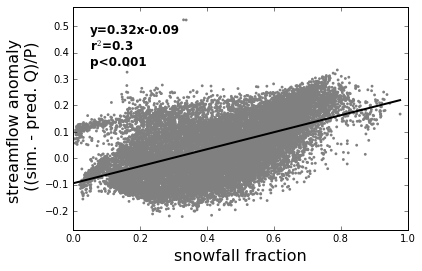

In [32]:
mod = sm.formula.ols('mean_anom ~ Sf + 1',d).fit()

# Make Supplemental Figure
savefig=False
sms = np.linspace(d.Sf.min(),d.Sf.max(),1000)

fig = plt.figure(figsize=(6,4))
plt.scatter(d.Sf,d.mean_anom,s=8,c='0.5',edgecolor='None')
plt.plot(sms,(sms*mod.params['Sf'])+mod.params['Intercept'],'-k',lw=2)
plt.xlabel('snowfall fraction',fontsize=16)
plt.ylabel('streamflow anomaly \n ((sim. - pred. Q)/P)',fontsize=16)
plt.ylim(d.mean_anom.min()-0.05,d.mean_anom.max()+0.05);
plt.xlim(0,1)
eqn = 'y=%sx%s'%(round(mod.params['Sf'],2),round(mod.params['Intercept'],2))+'\nr$^2$=%s \np<0.001'%(round(mod.rsquared,2))
plt.text(0.05,0.35,eqn,fontsize=12,fontweight='bold')

if savefig:
    plt.savefig('./figures/sf_qanom_p_supplemental.png',dpi=300,bbox_inches='tight')
    plt.savefig('./figures/sf_qanom_p_supplemental.pdf',bbox_inches='tight')

In [33]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mean_anom   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     8381.
Date:                Thu, 30 Jun 2016   Prob (F-statistic):               0.00
Time:                        13:47:19   Log-Likelihood:                 19819.
No. Observations:               19983   AIC:                        -3.963e+04
Df Residuals:                   19981   BIC:                        -3.962e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0941      0.002    -58.381      0.000        -0.097    -0.091
Sf             0.3218      0.004     91.548      0.000         0.315     0.329
==============================================================================
Omnibus:                      178.540   Durbin-Watson:                   0.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.790
Skew:                           0.109   Prob(JB):                     5.38e-30
Kurtosis:                       2.662   Cond. No.                         6.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
d['bf_P'] = d.bf/d.P # compute baseflow efficiency
d['R_P'] = d.meanrunoff/d.P # compute runoff efficiency

In [35]:
# fit linear regression for all methods
obfx2 = pd.DataFrame()
for m,a,ct in zip(methods,anom,citations):
    # fit snowmelt rate - budyko anomly relationship
    mod = smf.ols(a+' ~ snowmelt + 1',d).fit()
    obfx2.loc[m,'sm_ba_slope'] = mod.params['snowmelt']
    obfx2.loc[m,'sm_ba_intercept'] = mod.params['Intercept']
    obfx2.loc[m,'sm_ba_pval'] = mod.f_pvalue
    obfx2.loc[m,'sm_ba_r2'] = mod.rsquared
    
    # fit baseflow efficiency budyko anomaly relationship
    mod = smf.ols(a+' ~ bf_P + 1',d).fit()
    obfx2.loc[m,'bfe_ba_slope'] = mod.params['bf_P']
    obfx2.loc[m,'bfe_ba_intercept'] = mod.params['Intercept']
    obfx2.loc[m,'bfe_ba_pval'] = mod.f_pvalue
    obfx2.loc[m,'bfe_ba_r2'] = mod.rsquared
    
    # fit snowfall fraction - budyko anomaly relationship
    mod = smf.ols(a+' ~ Sf + 1',d).fit()
    obfx2.loc[m,'sf_ba_slope'] = mod.params['Sf']
    obfx2.loc[m,'sf_ba_intercept'] = mod.params['Intercept']
    obfx2.loc[m,'sf_ba_pval'] = mod.f_pvalue
    obfx2.loc[m,'sf_ba_r2'] = mod.rsquared
    
    # fit runoff efficiency - budyko anomaly relationship # waiting for calculations to finish...
    mod = smf.ols(a+' ~ R_P + 1',d).fit()
    obfx2.loc[m,'re_ba_slope'] = mod.params['R_P']
    obfx2.loc[m,'re_ba_intercept'] = mod.params['Intercept']
    obfx2.loc[m,'re_ba_pval'] = mod.f_pvalue
    obfx2.loc[m,'re_ba_r2'] = mod.rsquared
    
    obfx2.loc[m,'Equation'] = ct

In [36]:
er_fits = pd.DataFrame(index=np.arange(0,len(regs)*len(methods)+1)) # generate data frame for results

ct = 0
for er,name,color,erlab in zip(regs,regions,cbcust2,regcs): # loop through each ecoregion
    
    
    for m,eq in zip(methods,citations): # loop through each method
        
        mod = smf.ols(m+'_anom ~ snowmelt + 1',d.loc[d.rc==er]).fit() # fit the model
        er_fits.ix[ct,'method'] = m # populate method field
        er_fits.ix[ct,'ecoregion'] = er # populate ecoregion field
        er_fits.ix[ct,'r2'] = mod.rsquared
        er_fits.ix[ct,'pval'] = mod.f_pvalue
        er_fits.ix[ct,'intercept'] = mod.params['Intercept']
        er_fits.ix[ct,'slope'] = mod.params['snowmelt']
        er_fits.ix[ct,'name'] = name
        er_fits.ix[ct,'color1'] = color[0]
        er_fits.ix[ct,'color2'] = color[1]
        er_fits.ix[ct,'color3'] = color[2]
        er_fits.ix[ct,'mean_snowmelt'] = d.loc[d.rc==er,'snowmelt'].mean()
        er_fits.ix[ct,'min_snowmelt'] = d.loc[d.rc==er,'snowmelt'].min()
        er_fits.ix[ct,'max_snowmelt'] = d.loc[d.rc==er,'snowmelt'].max()
        er_fits.ix[ct,'Equation'] = eq
        er_fits.ix[ct,'er_label'] = erlab
        
        if mod.pvalues['snowmelt'] > 0.05:
            print er
            print m
            print mod.pvalues['snowmelt']
        
        ct += 1 # increment counter

6
schreiber
0.472437425917


In [37]:
er_fits.loc[er_fits.ecoregion == 2]

,method,ecoregion,r2,pval,intercept,slope,name,color1,color2,color3,mean_snowmelt,min_snowmelt,max_snowmelt,Equation,er_label
9,schreiber,2,0.011062,2.738125e-05,0.046057,0.003711,East Cascades,0.698039,0.87451,0.541176,3.575226,0.813247,15.723258,"Schreiber, 1904",3
10,oldekop,2,0.218236,1.134582e-86,0.063247,0.018192,East Cascades,0.698039,0.87451,0.541176,3.575226,0.813247,15.723258,"Ol'Dekop, 1911",3
11,turc_pike,2,0.133509,3.227914e-51,0.046838,0.013460,East Cascades,0.698039,0.87451,0.541176,3.575226,0.813247,15.723258,"Turc, 1955; Pike, 1964",3
12,budyko,2,0.085866,9.802402e-33,0.055059,0.010539,East Cascades,0.698039,0.87451,0.541176,3.575226,0.813247,15.723258,"Budyko, 1974",3
13,myc,2,0.119090,1.595960e-45,-0.032175,0.012684,East Cascades,0.698039,0.87451,0.541176,3.575226,0.813247,15.723258,"Mezentsev, 1955; Choudhury, 1999; Yang et al.,...",3
14,fuzhang,2,0.136209,2.707403e-52,-0.036847,0.013656,East Cascades,0.698039,0.87451,0.541176,3.575226,0.813247,15.723258,"Fu, 1981; Zhang et al., 2004",3
15,zhang,2,0.075017,1.183848e-28,-0.022569,0.009884,East Cascades,0.698039,0.87451,0.541176,3.575226,0.813247,15.723258,"Zhang et al., 2001",3
16,sharif,2,0.328709,4.262547e-139,-0.068978,0.024091,East Cascades,0.698039,0.87451,0.541176,3.575226,0.813247,15.723258,"Sharif et al., 2007",3
17,zhou,2,0.268479,1.549842e-109,-0.098968,0.020909,East Cascades,0.698039,0.87451,0.541176,3.575226,0.813247,15.723258,"Zhou et al., 2015",3


In [38]:
er_tab = pd.DataFrame({'min_r2':er_fits.groupby(by='ecoregion')['r2'].min(),
                      'max_r2':er_fits.groupby(by='ecoregion')['r2'].max(),
                      'mean_r2':er_fits.groupby(by='ecoregion')['r2'].mean(),
                      'min_pval':er_fits.groupby(by='ecoregion')['pval'].min(),
                      'max_pval':er_fits.groupby(by='ecoregion')['pval'].max(),
                      'mean_pval':er_fits.groupby(by='ecoregion')['pval'].mean(),
                      'min_slope':er_fits.groupby(by='ecoregion')['slope'].min(),
                      'max_slope':er_fits.groupby(by='ecoregion')['slope'].max(),
                      'mean_slope':er_fits.groupby(by='ecoregion')['slope'].mean(),
                      'min_intercept':er_fits.groupby(by='ecoregion')['intercept'].min(),
                      'max_intercept':er_fits.groupby(by='ecoregion')['intercept'].max(),
                      'mean_intercept':er_fits.groupby(by='ecoregion')['intercept'].mean(),
                      'name':er_fits.groupby(by='ecoregion')['name'].unique(),
                      'color1':er_fits.groupby(by='ecoregion')['color1'].mean(),
                      'color2':er_fits.groupby(by='ecoregion')['color2'].mean(),
                      'color3':er_fits.groupby(by='ecoregion')['color3'].mean(),
                      'mean_snowmelt':er_fits.groupby(by='ecoregion')['mean_snowmelt'].mean(),
                      'min_snowmelt':er_fits.groupby(by='ecoregion')['min_snowmelt'].mean(),
                      'max_snowmelt':er_fits.groupby(by='ecoregion')['max_snowmelt'].mean(),
                     'er_label':er_fits.groupby(by='ecoregion')['er_label'].mean()})

In [39]:
er_tab

,color1,color2,color3,er_label,max_intercept,max_pval,max_r2,max_slope,max_snowmelt,mean_intercept,mean_pval,mean_r2,mean_slope,mean_snowmelt,min_intercept,min_pval,min_r2,min_slope,min_snowmelt,name
ecoregion,,,,,,,,,,,,,,,,,,,,
1,0.121569,0.470588,0.705882,2,-0.045018,1.360964e-237,0.812094,0.022254,33.504125,-0.101959,1.512182e-238,0.722402,0.020883,8.177285,-0.144324,0.000000e+00,0.553251,0.019281,1.578520,[Cascades]
2,0.698039,0.874510,0.541176,3,0.063247,2.738125e-05,0.328709,0.024091,15.723258,-0.005371,3.042361e-06,0.152909,0.014125,3.575226,-0.098968,4.262547e-139,0.011062,0.003711,0.813247,[East Cascades]
3,0.650980,0.807843,0.890196,1,0.166117,7.639222e-05,0.569415,0.014552,35.238598,0.074696,8.488074e-06,0.223843,0.007702,9.065597,0.012602,1.138978e-166,0.017262,0.002798,1.362559,[North Cascades]
4,0.200000,0.627451,0.172549,4,0.142116,2.723469e-145,0.582443,0.027253,12.923191,0.045698,3.026077e-146,0.476928,0.019317,5.483745,-0.035112,1.885773e-266,0.376932,0.013509,0.920047,[Sierra]
6,0.792157,0.698039,0.839216,9,0.138275,4.724374e-01,0.309492,0.016533,16.412981,0.036489,5.249319e-02,0.089088,0.006988,5.574560,-0.056125,1.212376e-205,0.000204,0.000423,0.899974,[Northern Rockies]
7,0.992157,0.749020,0.435294,7,-0.025394,0.000000e+00,0.613803,0.048860,11.467365,-0.103337,0.000000e+00,0.489621,0.038241,2.892802,-0.190329,0.000000e+00,0.322946,0.027206,0.312694,[Middle Rockies]
8,0.415686,0.239216,0.603922,10,0.110613,8.344593e-54,0.663235,0.028512,12.914454,-0.018358,9.271770e-55,0.514942,0.019684,7.468346,-0.097527,1.148985e-139,0.336441,0.013022,1.181430,[Canadian Rockies]
9,1.000000,0.498039,0.000000,8,-0.005751,1.559317e-188,0.644407,0.041653,12.518186,-0.106302,1.732575e-189,0.518094,0.032045,5.931484,-0.201703,0.000000e+00,0.386661,0.024843,1.043319,[Idaho Batholith]
12,0.984314,0.603922,0.600000,5,-0.023821,2.490956e-29,0.546878,0.037385,9.458640,-0.081617,2.767729e-30,0.349311,0.026375,2.846349,-0.170779,1.332789e-211,0.098625,0.011860,0.508790,[Wasatch]


In [40]:
zhang = pd.DataFrame()
zhang['rc'] = regs

for er,color,name in zip(regs,cbcust2,regions):
    # extract data for curve fitting
    X = np.array([d[d.rc==er].P,d[d.rc==er].PETpenmanvic])
    y = d[d.rc==er].ET_P.as_matrix() 
    
    # Zhang - param
    param = bc.fit_zhang(X,y) # estimate w
    model = bc.zhang(X,param) # generate zhang curve
    zhang.loc[zhang.rc == er,'param'] = param
    zhang.loc[zhang.rc == er,'asmpt'] = model.max()
    zhang.loc[zhang.rc == er,'mean_snowmelt'] = d.loc[d.rc==er,'snowmelt'].mean()
    zhang.loc[zhang.rc == er,'color1'] = color[0]
    zhang.loc[zhang.rc == er,'color2'] = color[1]
    zhang.loc[zhang.rc == er,'color3'] = color[2]
    zhang.loc[zhang.rc == er,'Ecoregion'] = name

In [41]:
zhang

,rc,param,asmpt,mean_snowmelt,color1,color2,color3,Ecoregion
0,1,0.299543,0.763621,8.177285,0.121569,0.470588,0.705882,Cascades
1,2,0.483512,0.914517,3.575226,0.698039,0.874510,0.541176,East Cascades
2,3,-0.032795,0.736976,9.065597,0.650980,0.807843,0.890196,North Cascades
3,4,0.071390,0.861669,5.483745,0.200000,0.627451,0.172549,Sierra
4,6,0.382172,0.896499,5.574560,0.792157,0.698039,0.839216,Northern Rockies
5,7,0.759527,0.964712,2.892802,0.992157,0.749020,0.435294,Middle Rockies
6,8,0.130342,0.697511,7.468346,0.415686,0.239216,0.603922,Canadian Rockies
7,9,0.378985,0.891007,5.931484,1.000000,0.498039,0.000000,Idaho Batholith
8,12,0.874068,0.970024,2.846349,0.984314,0.603922,0.600000,Wasatch
9,13,1.059129,0.968271,2.471286,0.890196,0.101961,0.109804,Southern Rockies


## Recreate the manuscript plots

### Figure 3

In [51]:
printfigs = False

In [43]:
d['ln_snowmelt'] = np.log(d.snowmelt)

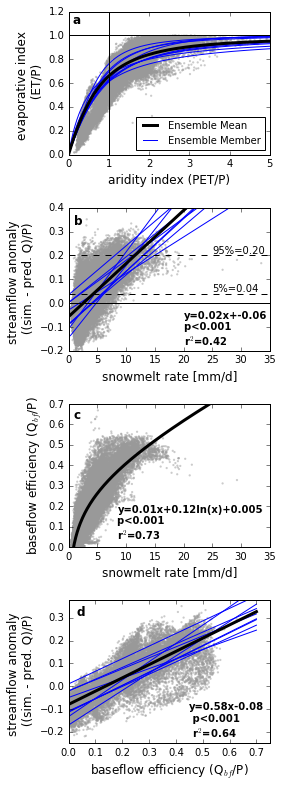

In [50]:
SF = 'Sf'
c='0.6'
rowcol = (1,27)
figsize = (4,11)
s = 5
alpha = 0.5

fontsize = 12
fig = plt.figure(figsize=figsize)



ax1 = fig.add_subplot(411)
# Budyko Curve and Sf Qanom 

ax1.scatter(d.PET_P,d.ET_P,s = s,c=c, alpha=alpha, edgecolor='none')
#ax1.plot(curves.PET_P,mean_bc,'-w', lw=5)
p1 = ax1.plot(curves.PET_P,mean_bc,'-k', lw=3, label='Ensemble Mean')

# plot all of the Budyko Curves
lw = 1
c2 = 'b'
ax1.plot(curves.PET_P,curves.schreiber,'-',lw=lw,c=c2,zorder=1)
ax1.plot(curves.PET_P,curves.oldekop,'-',lw=lw,c=c2,zorder=1)
ax1.plot(curves.PET_P,curves.turc_pike,'-',lw=lw,c=c2,zorder=1)
ax1.plot(curves.PET_P,curves.budyko,'-',lw=lw,c=c2,zorder=1)
ax1.plot(curves.PET_P,curves.myc,'-',lw=lw,c=c2,zorder=1)
ax1.plot(curves.PET_P,curves.fuzhang,'-',lw=lw,c=c2,zorder=1)
ax1.plot(curves.PET_P,curves.zhang,'-',lw=lw,c=c2,zorder=1)
ax1.plot(curves.PET_P,curves.sharif,'-',lw=lw,c=c2,zorder=1)
p2 = ax1.plot(curves.PET_P,curves.zhou,'-',label='Ensemble Member',lw=lw,c=c2,zorder=1)

ax1.set_ylabel('evaporative index \n (ET/P)',fontsize=fontsize)
ax1.set_xlabel('aridity index (PET/P)', fontsize=fontsize)
ax1.axhline(1,c='k')
ax1.axvline(1,c='k')
ax1.set_xlim(0,5);
ax1.set_ylim(0,1.2);
ax1.annotate('a',[0.1,1.1], fontsize = fontsize, fontweight = 'bold', color='k');
leg = ax1.legend(['Ensemble Mean','Ensemble Member'],loc='lower right',fontsize=10)
#lines = leg.get_lines()
#line = lines[0]
#line.set_color('b')
#line.set_linewidth(1)

ax2 = fig.add_subplot(412)
## now Qanom vs Snowmelt rate

#for a in anom:
#    ax2.scatter(d.snowmelt,d[a],s=s,c=c,alpha=alpha, edgecolor='none')

p1 = ax2.scatter(d.snowmelt,mean_anom,s = s, c = c, alpha = alpha, edgecolor = 'none');

X = np.arange(d.snowmelt.min(),d.snowmelt.max(),0.1)
y = X*obfx2.sm_ba_slope.mean()+obfx2.sm_ba_intercept.mean()

#ax2.plot(X,y,'-w', lw = 5) # outline
ax2.plot(X,y,'-k', lw = 3, label = 'Ensamble Mean')

# plot the ensemble of curves
for a in anom:
    # fit snowmelt rate - budyko anomly relationship
    mod = smf.ols(a+' ~ snowmelt + 1',d).fit()
    y = X*mod.params['snowmelt']+mod.params['Intercept']
    ax2.plot(X,y,'-', lw = lw, c=c2,zorder=1)

ax2.set_xlabel('snowmelt rate [mm/d]', fontsize = fontsize);
ax2.set_ylabel('streamflow anomaly \n ((sim. - pred. Q)/P)', fontsize=fontsize)
ax2.annotate('b',[1,0.33], fontsize = fontsize, fontweight = 'bold',color='k');

# plot the 5th and 95th percentiles of the data
ax2.axhline(0.2, c='k',ls='--',lw = 1)
ax2.text(25,0.05,'5%=0.04')
ax2.axhline(0.04 ,c='k',ls='--',lw=1)
ax2.text(25,0.21,'95%=0.20')

ax2.axhline(0,c='k',lw=1)
ax2.set_xlim(0,35)
ax2.set_ylim(-.2,0.4)
eq = 'y='+str(round(obfx2.sm_ba_slope.mean(),2))+'x+'+str(round(obfx2.sm_ba_intercept.mean(),2))+'\np<0.001 \nr$^2$='+str(round(obfx2.sm_ba_r2.mean(),2))
ax2.text(20,-0.175,eq,fontweight='bold');
#print eq

ax3 = fig.add_subplot(413)
## Snowmelt rate vs baseflow
mod = smf.ols('bf_P ~ snowmelt + ln_snowmelt + 1',d).fit()
p2 = ax3.scatter(d.snowmelt,d.bf_P,s = s, c = c, edgecolor = 'none', alpha = alpha)
ax3.set_xlabel('snowmelt rate [mm/d]', fontsize=fontsize)
ax3.set_ylabel('baseflow efficiency (Q$_{bf}$/P)', fontsize=fontsize)
ax3.annotate('c',[0.8,0.63], fontsize = fontsize, fontweight = 'bold',color='k');
eq = 'y='+str(round(mod.params.snowmelt,2))+'x+'+str(round(mod.params['ln_snowmelt'],2))+'ln(x)+'+str(round(mod.params.Intercept,3))+'\np<0.001 \nr$^2$='+str(round(mod.rsquared,2))
ax3.text(8.5,0.04,eq,fontweight='bold');
ax3.set_xlim(0,35)
ax3.set_ylim(0,0.7)
xnew = np.linspace(0.31269355539464155,40,300)
ynew = mod.params['Intercept'] + xnew*mod.params['snowmelt'] + np.log(xnew)*mod.params['ln_snowmelt']
ax3.plot(xnew,ynew,'-k', lw = 3)
#ax3.plot(xx,yy,'-k', lw = 3)

ax4 = fig.add_subplot(414)
## Baseflow vs Runoff anomaly

X = np.arange(d.bf_P.min(),d.bf_P.max()+0.1,0.1)
y = (X*obfx2.bfe_ba_slope.mean())+obfx2.bfe_ba_intercept.mean()

p3 = ax4.scatter(d.bf_P,mean_anom,s = s, c = c, edgecolor = 'none', alpha = alpha)
ax4.set_xlabel('baseflow efficiency (Q$_{bf}$/P)', fontsize=fontsize)
ax4.set_ylabel('streamflow anomaly \n ((sim. - pred. Q)/P)', fontsize=fontsize)
eq = 'y='+str(round(obfx2.bfe_ba_slope.mean(),2))+'x'+str(round(obfx2.bfe_ba_intercept.mean(),2))+'\n p<0.001 \n r$^{2}$='+str(round(obfx2.bfe_ba_r2.mean(),2))
ax4.text(0.45,0.-0.22,eq,fontweight='bold');
ax4.set_xlim(0,X.max()+0.05)
ax4.set_ylim(-0.25,y.max()+0.05)
ax4.annotate('d',[0.03,0.31], fontsize = fontsize, fontweight = 'bold',color='k');

#ax4.plot(X,y,'-w', lw = 5); # plot outline
ax4.plot(X,y,'-k', lw = 3);

# plot the ensemble of curves
for a in anom:
    # fit snowmelt rate - budyko anomly relationship
    mod = smf.ols(a+' ~ bf_P + 1',d).fit()
    y = X*mod.params['bf_P']+mod.params['Intercept']
    ax4.plot(X,y,'-', lw = lw, c=c2,zorder=1)

fig.tight_layout();

if printfigs:
    plt.savefig('./figures/GRL_4_pannel_vert_rev1.png', bbox_inches='tight',dpi=300)
    plt.savefig('./figures/comment_4_pannel_vert_rev1.pdf', bbox_inches='tight')

### Test if mean budyko anom is different from 0

In [52]:
from scipy import stats as ss

In [53]:
ss.ttest_1samp(mean_anom,0)

Ttest_1sampResult(statistic=54.9207117182358, pvalue=0.0)

### Figure 4

In [54]:
er_tab

,color1,color2,color3,er_label,max_intercept,max_pval,max_r2,max_slope,max_snowmelt,mean_intercept,mean_pval,mean_r2,mean_slope,mean_snowmelt,min_intercept,min_pval,min_r2,min_slope,min_snowmelt,name
ecoregion,,,,,,,,,,,,,,,,,,,,
1,0.121569,0.470588,0.705882,2,-0.045018,1.360964e-237,0.812094,0.022254,33.504125,-0.101959,1.512182e-238,0.722402,0.020883,8.177285,-0.144324,0.000000e+00,0.553251,0.019281,1.578520,[Cascades]
2,0.698039,0.874510,0.541176,3,0.063247,2.738125e-05,0.328709,0.024091,15.723258,-0.005371,3.042361e-06,0.152909,0.014125,3.575226,-0.098968,4.262547e-139,0.011062,0.003711,0.813247,[East Cascades]
3,0.650980,0.807843,0.890196,1,0.166117,7.639222e-05,0.569415,0.014552,35.238598,0.074696,8.488074e-06,0.223843,0.007702,9.065597,0.012602,1.138978e-166,0.017262,0.002798,1.362559,[North Cascades]
4,0.200000,0.627451,0.172549,4,0.142116,2.723469e-145,0.582443,0.027253,12.923191,0.045698,3.026077e-146,0.476928,0.019317,5.483745,-0.035112,1.885773e-266,0.376932,0.013509,0.920047,[Sierra]
6,0.792157,0.698039,0.839216,9,0.138275,4.724374e-01,0.309492,0.016533,16.412981,0.036489,5.249319e-02,0.089088,0.006988,5.574560,-0.056125,1.212376e-205,0.000204,0.000423,0.899974,[Northern Rockies]
7,0.992157,0.749020,0.435294,7,-0.025394,0.000000e+00,0.613803,0.048860,11.467365,-0.103337,0.000000e+00,0.489621,0.038241,2.892802,-0.190329,0.000000e+00,0.322946,0.027206,0.312694,[Middle Rockies]
8,0.415686,0.239216,0.603922,10,0.110613,8.344593e-54,0.663235,0.028512,12.914454,-0.018358,9.271770e-55,0.514942,0.019684,7.468346,-0.097527,1.148985e-139,0.336441,0.013022,1.181430,[Canadian Rockies]
9,1.000000,0.498039,0.000000,8,-0.005751,1.559317e-188,0.644407,0.041653,12.518186,-0.106302,1.732575e-189,0.518094,0.032045,5.931484,-0.201703,0.000000e+00,0.386661,0.024843,1.043319,[Idaho Batholith]
12,0.984314,0.603922,0.600000,5,-0.023821,2.490956e-29,0.546878,0.037385,9.458640,-0.081617,2.767729e-30,0.349311,0.026375,2.846349,-0.170779,1.332789e-211,0.098625,0.011860,0.508790,[Wasatch]


In [55]:
er_tab.sort_values(by='mean_slope',inplace=True,ascending=False) # sort by slope

In [56]:
# generate titles
names = []
for idx in er_tab.index:
    names.append(str(int(er_tab.ix[idx,'er_label']))+': '+er_tab.ix[idx,'name'][0]+',\n slope='+str(round(er_tab.ix[idx,'mean_slope'],3))+', r$^2$='+str(round(er_tab.ix[idx,'mean_r2'],2)))

/Users/barnhatb/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


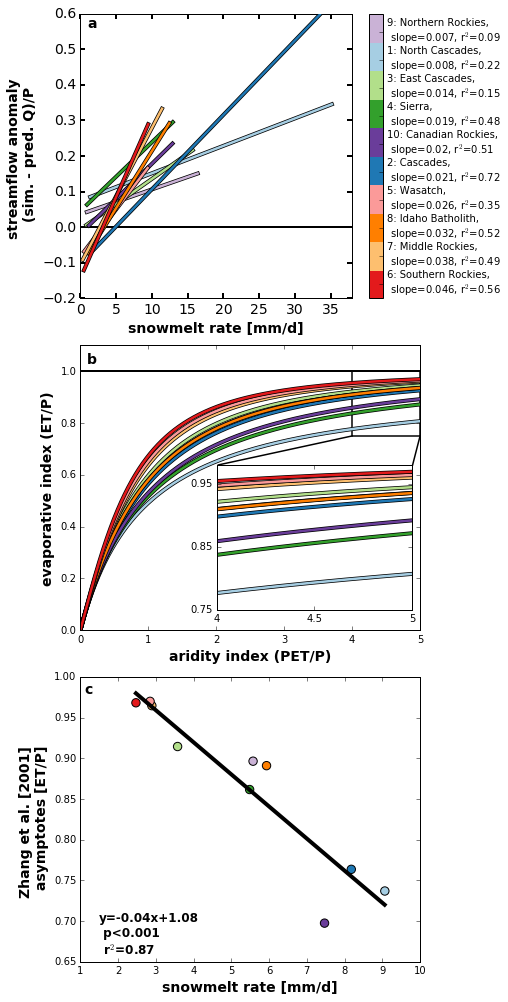

In [57]:
printfigs=False

dim = 14.
fig = plt.figure(figsize=(7,dim))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
cmap = []

for idx in er_tab.index:    
    c = (er_tab.ix[idx,'color1'],er_tab.ix[idx,'color2'],er_tab.ix[idx,'color3'])
    cmap.append(c)
cmap = mpl.colors.ListedColormap(cmap)
p1 = ax1.scatter(mean_anom,d.snowmelt,s = 0, c = data.rc, alpha = 0.3, edgecolor = 'none',cmap=cmap);

ct = 0

for idx in er_tab.index:    
    c = (er_tab.ix[idx,'color1'],er_tab.ix[idx,'color2'],er_tab.ix[idx,'color3'])
    X = np.arange(er_tab.ix[idx,'min_snowmelt'],er_tab.ix[idx,'max_snowmelt'],0.1)
    Y = X*er_tab.ix[idx,'mean_slope']+er_tab.ix[idx,'mean_intercept']
    ax1.plot(X,Y, c='k', lw=4,zorder=10-ct);
    ax1.plot(X,Y, c=c, lw=2.5,zorder=10-ct);
    ct += 1

ax1.axhline(0,c='k')

ax1.set_xlabel('snowmelt rate [mm/d]', fontsize = 14,fontweight = 'bold');
ax1.set_ylabel('streamflow anomaly \n (sim. - pred. Q)/P', fontsize=14,fontweight = 'bold');

ax1.axhline(0,c='k',lw=2);
ax1.set_xlim(0,38);
ax1.set_ylim(-.2,0.6);
ax1.tick_params(width=2,length=5);
ax1.text(1.0,0.56,'a', fontweight='bold', fontsize=14)
    
plt.setp(ax1.get_xticklabels(),fontsize=14,fontweight ='medium');
plt.setp(ax1.get_yticklabels(),fontsize=14, fontweight = 'medium');

# plot the different zhang curves
ct = 0
cmap2 = []
for er in zhang.rc:
    c = (zhang.loc[zhang.rc==er,'color1'].as_matrix()[0],zhang.loc[zhang.rc==er,'color2'].as_matrix()[0],zhang.loc[zhang.rc==er,'color3'].as_matrix()[0])
    Y = bc.zhang(X2,zhang.loc[zhang.rc == er,'param'].as_matrix())
    ax2.plot(X2[1]/X2[0],Y,c='k', lw=4)
    ax2.plot(X2[1]/X2[0],Y,c=c, lw=2.5)
    cmap2.append(c)
    
ax2.axhline(1,c='k',lw=2)
ax2.set_ylim(0,1.1)
ax2.set_xlim(0,5)
ax2.set_xlabel('aridity index (PET/P)', fontsize = 14,fontweight = 'bold')
ax2.set_ylabel('evaporative index (ET/P)', fontsize = 14,fontweight = 'bold')
ax2.text(0.1,1.03,'b', fontweight='bold', fontsize=14)
ax2.add_patch(Polygon([[4,0.75], [4, 1], [5, 1], [5, 0.75]], closed=True,
                      fill=False,linewidth=1.5))
ax2.plot([4,2.03],[0.75,0.638],'-k',lw=1.5)
ax2.plot([5,4.89],[0.75,0.638],'-k',lw=1.5)


subax2 = add_subplot_axes(ax2,[0.4,-0.032,0.5,0.63],axisbg='w')
for er in zhang.rc:
    c = (zhang.loc[zhang.rc==er,'color1'].as_matrix()[0],zhang.loc[zhang.rc==er,'color2'].as_matrix()[0],zhang.loc[zhang.rc==er,'color3'].as_matrix()[0])
    Y = bc.zhang(X2,zhang.loc[zhang.rc == er,'param'].as_matrix())
    subax2.plot(X2[1]/X2[0],Y,c='k', lw=4)
    subax2.plot(X2[1]/X2[0],Y,c=c, lw=2.5)
    
subax2.set_ylim(0.75,0.98)
subax2.set_xlim(4,5)
subax2.set_xticks([4,4.5,5])
subax2.set_xticklabels([4,4.5,5],fontsize=10)
subax2.set_yticks([0.75,0.85,0.95])
subax2.set_yticklabels([0.75,0.85,0.95],fontsize=10)
#subax2.set_xlabel('PET/P', fontsize = 10,fontweight = 'medium')
#subax2.set_ylabel('ET/P', fontsize = 10,fontweight = 'medium')


# plot the zhang asymptotes vs the average snowmelt rate
x = np.arange(er_tab.mean_snowmelt.min(),er_tab.mean_snowmelt.max(),0.01)
res = smf.ols('asmpt ~ mean_snowmelt + 1', zhang).fit()

ax3.plot(x,x*res.params[1]+res.params[0], c='k',lw=4)
ax3.scatter(zhang.mean_snowmelt,zhang.asmpt,s=70,c=cmap2)
ax3.set_xlabel('snowmelt rate [mm/d]', fontsize = 14,fontweight = 'bold');
ax3.set_ylabel('Zhang et al. [2001] \n asymptotes [ET/P]', fontsize = 14,fontweight = 'bold');
eqn = 'y='+str(round(res.params[1],2))+'x+'+str(round(res.params[0],2))+'\n p<0.001 \n r$^2$='+str(round(res.rsquared,2))
ax3.set_xlim(1,10)
ax3.text(1.5,0.66,eqn,fontweight='bold',fontsize=12)
ax3.text(1.1,0.98,'c', fontweight='bold', fontsize=14)
plt.sca(ax1)
cb=plt.colorbar(p1, spacing='uniform',cmap=cmap);
strt = 1.6
st = 1.18
cb.set_ticks([strt,strt+st*1,strt+st*2,strt+st*3,strt+st*4,strt+st*5,strt+st*6,strt+st*7,strt+st*8,strt+st*9]);
cb.set_ticklabels(names);
cb.set_alpha(1);
cb.draw_all();

fig.tight_layout()

if printfigs:
    plt.savefig('./figures/small2_ecoregions_Qanom_netSnowmelt_rev1.png',bbox_inches='tight',dpi=300)
    plt.savefig('./figures/small2_ecoregions_Qanom_netSnowmelt_rev1.pdf',bbox_inches='tight')

# Generate Supplemental Tables

In [51]:
obfx3 = obfx2.copy()
obfx3.index = obfx2.Equation

zhang['er_label'] = regcs
#zhang.index = zhang.Ecoregion
zhang2 = zhang[['er_label','param','asmpt','mean_snowmelt']]
zhang2 = zhang2.round(2)
zhang2.columns = ['Ecoregion Code','Fitting Parameter (w)','Asymptote','Mean Snowmelt Rate [mm/d]']
zhang2.reset_index(inplace=True)
del zhang2['Ecoregion']

KeyError: 'Ecoregion'

In [ ]:
## Table S1 is the statistical data data for each Budyko Type equation

## Snowmelt Rate - Budyko Streamflow Anomaly
TS2 = obfx3.filter(regex='sm_ba').round(3) # snowmelt - Budyko Anomaly for each budyko style equation
TS2.columns = ['Slope','Intercept','p','r2']
TS2.loc[TS2.p<0.001,'p'] = '<0.001'

In [ ]:
TS2

In [ ]:
## Baseflow Efficiency - Budyko streamflow anomaly 
TS3 = obfx3.filter(regex='bfe_ba').round(3) # baseflow efficiency - Budyko anomaly for each budyko style equation
TS3.columns = ['Slope','Intercept','p','r2']
TS3.loc[TS3.p<0.001,'p'] = '<0.001'

In [ ]:
TS3

In [ ]:
## Baseflow anomaly - snowmelt rate for each ecoregion and budyko-type equation 

TS4 = er_fits
arrays = [TS4.Equation,TS4.er_label]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples,names=['Equation','Ecoregion Code'])
TS4.index = index
TS4.sort_values(by=['Equation','ecoregion'],inplace=True)
TS4 = TS4[['r2','pval','intercept','slope']]
TS4.columns = ['r2','p','Intercept','Slope']
TS4 = TS4.round(3)
TS4.loc[TS4.p<0.001,'p'] = '<0.001'

In [ ]:
TS4

In [ ]:
## Zhang et al [2001] asymptotes
TS5 = zhang2
TS5.index = TS5['Ecoregion Code']
del TS5['Ecoregion Code']

In [ ]:
TS5

In [ ]:
TS6 = obfx3.filter(regex='sf_ba').round(3) # baseflow efficiency - Budyko anomaly for each budyko style equation
TS6.columns = ['Slope','Intercept','p','r2']
TS6.loc[TS6.p<0.001,'p'] = '<0.001'

In [ ]:
TS6

In [ ]:
## Export Supplemental Tables
#TS2.to_excel('./figures/GRL_S2_v8_supplemental_table_2.xlsx') # Snowmelt rate - BSA by equation (global)
#TS3.to_excel('./figures/GRL_S2_v8_supplemental_table_3.xlsx') # Baseflow efficiency - BSA by equation (global)
#TS4.to_excel('./figures/GRL_S2_v8_supplemental_table_4.xlsx') # sm - BSA by ecoregion and equation
#TS5.to_excel('./figures/GRL_S2_v8_supplemental_table_5.xlsx') # zhang asyptotes
#TS6.to_excel('./figures/GRL_S2_v8_supplemental_table_6.xlsx') #snowfall fraction - BSA by equation (global)

# Do some more explorations 

In [ ]:
mod = smf.ols('R_P ~ snowmelt + ln_snowmelt + 1',d).fit()

In [ ]:
print mod.summary()

In [ ]:
mod = smf.ols('bf_P ~ snowmelt + ln_snowmelt + 1',d).fit()
print mod.summary()

In [ ]:
d['mean_anom'] = mean_anom

In [ ]:
mod = smf.ols('mean_anom ~ snowmelt + 1',d).fit()
print mod.summary()
#plt.hist(mod.resid,100,facecolor='0.5');
#plt.axvline(0,c='k',lw=2)
plt.plot(d.snowmelt,mod.resid,'.k')

In [ ]:
mod = smf.ols('mean_anom ~ snowmelt + ln_snowmelt + 1',d).fit()
print mod.summary()
#plt.hist(mod.resid,100,facecolor='0.5');
#plt.axvline(0,c='k',lw=2)
plt.plot(d.snowmelt,mod.resid,'.k')

In [ ]:
d.snowmelt.quantile(0.95)

### Test some other relationships for the minor revisions

In [52]:
d.columns

Index([u'PETpenmanvic', u'P', u'ET', u'snowmelt', u'bf', u'rc', u'rr', u'Sf',
       u'meanrunoff', u'rr', u'w_flux', u'meanpeakswe', u'meandopeakswe',
       u'ET_P', u'PET_P', u'schreiber', u'oldekop', u'turc_pike', u'budyko',
       u'myc', u'fuzhang', u'zhang', u'sharif', u'zhou', u'schreiber_resid',
       u'oldekop_resid', u'turc_pike_resid', u'budyko_resid', u'myc_resid',
       u'fuzhang_resid', u'zhang_resid', u'sharif_resid', u'zhou_resid',
       u'schreiber_anom', u'oldekop_anom', u'turc_pike_anom', u'budyko_anom',
       u'myc_anom', u'fuzhang_anom', u'zhang_anom', u'sharif_anom',
       u'zhou_anom', u'mean_anom', u'bf_P', u'R_P', u'ln_snowmelt'],
      dtype='object')

In [55]:
modx1 = smf.ols('mean_anom ~ w_flux +1',d).fit()
print modx1.summary()

                            OLS Regression Results                            
Dep. Variable:              mean_anom   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.262e+04
Date:                Thu, 23 Jun 2016   Prob (F-statistic):               0.00
Time:                        10:23:12   Log-Likelihood:                 21211.
No. Observations:               19983   AIC:                        -4.242e+04
Df Residuals:                   19981   BIC:                        -4.240e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0737      0.001    -62.229      0.0

In [56]:
modx2 = smf.ols('mean_anom ~ meandopeakswe +1',d).fit()
print modx2.summary()

                            OLS Regression Results                            
Dep. Variable:              mean_anom   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     8624.
Date:                Thu, 23 Jun 2016   Prob (F-statistic):               0.00
Time:                        10:23:33   Log-Likelihood:                 19904.
No. Observations:               19983   AIC:                        -3.980e+04
Df Residuals:                   19981   BIC:                        -3.979e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -0.2404      0.003    -77.516

In [58]:
modx3 = smf.ols('mean_anom ~ meanpeakswe +1',d).fit()
print modx3.summary()

                            OLS Regression Results                            
Dep. Variable:              mean_anom   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.599e+04
Date:                Thu, 23 Jun 2016   Prob (F-statistic):               0.00
Time:                        10:24:05   Log-Likelihood:                 22195.
No. Observations:               19983   AIC:                        -4.439e+04
Df Residuals:                   19981   BIC:                        -4.437e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.0271      0.001    -34.623      